In [15]:
# import dependencies for file processing
import os
import csv
import numpy as np

In [16]:
# filepath
a_z_path = 'data/A_Z Handwritten Data.csv'

In [17]:
# readfile
with open(a_z_path) as training_file:
        reader = csv.reader(training_file, delimiter = ',')
        header = []
        labels = []
        images = []
        for row in reader:
            labels.append(row[0])
            pixel = np.array(row[1:785])
            # images are of 28 x 28 grayscale
            pix_split = np.array_split(pixel, 28)
            images.append(pix_split)   

In [23]:
NUM_LABELS = len(labels)
NUM_IMAGES = len(images)
NUM_UNIQUE_LABELS = len(list(set(labels)))
unique_labels = list(set(labels))

In [24]:
print('Number of Images:', NUM_IMAGES)
print('Number of Labels:', NUM_LABELS)
print('Number of Unique Labels:', NUM_UNIQUE_LABELS)

Number of Images: 372451
Number of Labels: 372451
Number of Unique Labels: 26


In [26]:
# shuffle list
import random
zipped = list(zip(images, labels))
shuffled = random.sample(zipped, len(zipped))

In [28]:
# unpack images and labels
shuffled_images, shuffled_labels = zip(*shuffled)

In [29]:
# set split value
split_frac = 0.9
split_num = int(split_frac*len(shuffled_images))

In [30]:
# split into train and test
train_images = shuffled_images[: split_num]
train_labels = shuffled_labels[: split_num]
test_images = shuffled_images[split_num : ]
test_labels = shuffled_labels[split_num : ]

In [31]:
print('Number of Train Images:', len(train_images))
print('Number of Train Labels:',len(train_labels))
print('Number of Test Images:',len(test_images))
print('Number of Test Labels:',len(test_labels))

Number of Train Images: 335205
Number of Train Labels: 335205
Number of Test Images: 37246
Number of Test Labels: 37246


In [32]:
# convert data to arrays
train_images = np.array(train_images).astype(float)
train_labels = np.array(train_labels).astype(float)
test_images = np.array(test_images).astype(float)
test_labels = np.array(test_labels).astype(float)

In [80]:
import string
# list to hold alphabets
chars = []
# loop and append letters to chars
for letter in string.ascii_uppercase:
    chars.append(letter)

In [87]:
# create a dictionary to map labels to alphabets
print('There are {} characters of the alphabet in chars.'.format(len(chars)))
idx_to_char = {x:chars[x] for x in range(0, 26)}

There are 26 characters of the alphabet in chars.


In [84]:
# inspect idx_to_chars
idx_to_char

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

Train label 18.0 : S


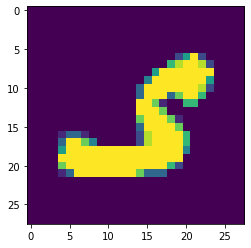

In [101]:
# inspect the images
# print a random item
import numpy as np
np.set_printoptions(linewidth=200)
num_index = np.random.randint(0, int(len(train_images)))
import matplotlib.pyplot as plt
plt.imshow(train_images[num_index])
train_label = train_labels[num_index]
print('Train label {} : {}'.format(train_label, idx_to_char[int(train_label)]))
# print(train_images[num_index])